# Amazon Reviews Analysis

This notebook provides a comprehensive analysis of Amazon product reviews, focusing on data cleaning, sentiment analysis, and clustering insights.

In [45]:
import pandas as pd

# Load the dataset
file_path = '../data/Cell_Phones_&_Accessories.txt.gz'

try:
    df = pd.read_csv(file_path, compression='gzip', sep='\t')
    # Display the first few rows of the dataframe
    print(df.head())
except FileNotFoundError:
    print("File not found. Please ensure the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")


                       product/productId: B000JVER7W
0  product/title: Mobile Action MA730 Handset Man...
1                             product/price: unknown
2                      review/userId: A1RXYH9ROBAKEZ
3                        review/profileName: A. Igoe
4                            review/helpfulness: 0/0


## Data Cleaning and Formatting

The raw data is stored as key-value pairs in text format. The following steps are performed to structure the data into a DataFrame:
- Parsing lines into key-value pairs.
- Grouping related data into individual records.
- Converting the data into a format suitable for analysis.

In [46]:
import pandas as pd
import gzip

# Load the dataset
file_path = '../data/Cell_Phones_&_Accessories.txt.gz'

try:
    # Read the .gz file
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        lines = f.readlines()

    # Split each line by ': ' and convert to a dictionary of product attributes
    data = []
    current_review = {}

    for line in lines:
        line = line.strip()
        
        # Check if the line contains two parts (key and value)
        if ": " in line:
            key, value = line.split(": ", 1)
            if key.startswith("product"):
                if current_review:
                    data.append(current_review)  # Append the previous review if it's complete
                current_review = {key: value}  # Start new review
            else:
                current_review[key] = value  # Add additional data to the current review
    
    if current_review:
        data.append(current_review)  # Append the last review if any

    # Convert to DataFrame
    df = pd.DataFrame(data)
    # Display the first few rows
    print(df.head())

except FileNotFoundError:
    print("File not found. Please ensure the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")


  product/productId                                      product/title  \
0        B000JVER7W                                                NaN   
1               NaN  Mobile Action MA730 Handset Manager - Bluetoot...   
2               NaN                                                NaN   
3        B000JVER7W                                                NaN   
4               NaN  Mobile Action MA730 Handset Manager - Bluetoot...   

  product/price   review/userId review/profileName review/helpfulness  \
0           NaN             NaN                NaN                NaN   
1           NaN             NaN                NaN                NaN   
2       unknown  A1RXYH9ROBAKEZ            A. Igoe                0/0   
3           NaN             NaN                NaN                NaN   
4           NaN             NaN                NaN                NaN   

  review/score review/time review/summary  \
0          NaN         NaN            NaN   
1          NaN         NaN

In [47]:
# Statistics for missing values and 'unknown'
nan_counts = df.isna().sum()  # Count NaN in each column
unknown_counts = (df == 'unknown').sum()  # Count occurrences of 'unknown' in each column

# General information about the data
total_rows = len(df)
total_columns = len(df.columns)

# Display results
print("Number of rows in the dataset:", total_rows)
print("Number of columns in the dataset:", total_columns)

print("\nStatistics for NaN values:")
print(nan_counts)

print("\nStatistics for 'unknown' values:")
print(unknown_counts)

# Percentage of missing data for each column
nan_percentage = (nan_counts / total_rows) * 100
print("\nPercentage of missing data for each column:")
print(nan_percentage)


Number of rows in the dataset: 236243
Number of columns in the dataset: 10

Statistics for NaN values:
product/productId     157313
product/title         157860
product/price         157313
review/userId         157313
review/profileName    157313
review/helpfulness    157313
review/score          157313
review/time           157313
review/summary        157315
review/text           157313
dtype: int64

Statistics for 'unknown' values:
product/productId         0
product/title             0
product/price         43287
review/userId          2276
review/profileName     2276
review/helpfulness        0
review/score              0
review/time               0
review/summary            0
review/text               0
dtype: int64

Percentage of missing data for each column:
product/productId     66.589486
product/title         66.821028
product/price         66.589486
review/userId         66.589486
review/profileName    66.589486
review/helpfulness    66.589486
review/score          66.58948

In [48]:
print("Examples where 'review/text' is NaN:")
print(df[df['review/text'].isna()].head(5))

print("\nExamples where 'product/price' is 'unknown':")
print(df[df['product/price'] == 'unknown'].head(5))

print("\nExamples with multiple NaNs in a row:")
print(df[df.isna().sum(axis=1) > 7].head(5))


Examples where 'review/text' is NaN:
  product/productId                                      product/title  \
0        B000JVER7W                                                NaN   
1               NaN  Mobile Action MA730 Handset Manager - Bluetoot...   
3        B000JVER7W                                                NaN   
4               NaN  Mobile Action MA730 Handset Manager - Bluetoot...   
6        B000JVER7W                                                NaN   

  product/price review/userId review/profileName review/helpfulness  \
0           NaN           NaN                NaN                NaN   
1           NaN           NaN                NaN                NaN   
3           NaN           NaN                NaN                NaN   
4           NaN           NaN                NaN                NaN   
6           NaN           NaN                NaN                NaN   

  review/score review/time review/summary review/text  
0          NaN         NaN         

# Framed Data Summary

The cleaned dataset is loaded and analyzed for missing values, unique values, and inconsistencies.

In [49]:
# Load the dataset
file_path = '../data/cleaned_amazon_reviews.csv'

try:
    df = pd.read_csv(file_path)
    # Display the first few rows of the dataframe
    print(df.head())
except FileNotFoundError:
    print("File not found. Please ensure the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")

  product/productId                                      product/title  \
0        B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   
1        B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   
2        B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   
3        B000924R5I  USB Data Cable for Sony-Ericsson Z600, Z500, Z...   
4        B000924R5I  USB Data Cable for Sony-Ericsson Z600, Z500, Z...   

   product/price   review/userId                  review/profileName  \
0            NaN  A1RXYH9ROBAKEZ                             A. Igoe   
1            NaN   A7L6E1KSJTAJ6                        Steven Martz   
2            NaN  A2NOQQ7I6PU7CW  Daniel M. Johnson "rocknbluesharp"   
3            NaN  A29Q0CLOF0U8BN                            E. Owens   
4            NaN   ANNHJND2MHUI3         Isaac Salas "=CRBF=gB^link"   

  review/helpfulness  review/score review/time  \
0                0/0           1.0  2009-01-31   
1                0/0  

## We Need to Take Care of Problematic Data
- This segment requires 'src/preprocessing.py' to run

In [50]:

print("\nNull values in the dataset:")
print(df.isnull().sum())



Null values in the dataset:
product/productId                     0
product/title                       547
product/price                     43287
review/userId                         0
review/profileName                    3
review/helpfulness                    0
review/score                          0
review/time                           0
review/summary                        3
review/text                           0
review/helpfulness_numerator          0
review/helpfulness_denominator        0
dtype: int64


In [51]:
# Number of unique values in each column
for col in df.columns:
    print(f"Number of unique values in {col}: {df[col].nunique()}")


Number of unique values in product/productId: 7438
Number of unique values in product/title: 7149
Number of unique values in product/price: 943
Number of unique values in review/userId: 68041
Number of unique values in review/profileName: 63367
Number of unique values in review/helpfulness: 1305
Number of unique values in review/score: 5
Number of unique values in review/time: 4431
Number of unique values in review/summary: 60319
Number of unique values in review/text: 77390
Number of unique values in review/helpfulness_numerator: 197
Number of unique values in review/helpfulness_denominator: 209


## UserID and profile name being unknown should be treated as NA

In [52]:
df['review/userId'] = df['review/userId'].replace('unknown', pd.NA)
df['review/profileName'] = df['review/profileName'].replace('unknown', pd.NA)


In [53]:
# Description of the dataset 
print("\nDescription of the dataset:")
print(df.describe(include='all'))  # include='all' includes text columns as well


Description of the dataset:
       product/productId                                      product/title  \
count              78930                                              78383   
unique              7438                                               7149   
top           B0009B0IX4  Plantronics Voyager 510 Bluetooth Headset [Ret...   
freq                3443                                               3443   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

        product/price 

In [54]:
# Find the rows with the lowest prices and the rows with missing prices
lowest_prices = df[df['product/price'] == df['product/price'].min()]
missing_prices = df[df['product/price'].isnull()]

# Display the results
lowest_prices.head(10), missing_prices.head(10)


(     product/productId                                      product/title  \
 3004        B000E7FLYY  USB Data Cable for Sony-Ericsson W800/ W800C/ ...   
 3599        B00030KI9U  Blackberry 8310 8320 8330 Curve 8100 8110 8120...   
 3600        B00030KI9U  Blackberry 8310 8320 8330 Curve 8100 8110 8120...   
 3601        B00030KI9U  Blackberry 8310 8320 8330 Curve 8100 8110 8120...   
 3602        B00030KI9U  Blackberry 8310 8320 8330 Curve 8100 8110 8120...   
 3603        B00030KI9U  Blackberry 8310 8320 8330 Curve 8100 8110 8120...   
 3633        B000Q8XSVO           Inspire's Car Charger for Microsoft Zune   
 3634        B000Q8XSVO           Inspire's Car Charger for Microsoft Zune   
 3635        B000Q8XSVO           Inspire's Car Charger for Microsoft Zune   
 3636        B000Q8XSVO           Inspire's Car Charger for Microsoft Zune   
 
       product/price   review/userId                review/profileName  \
 3004           0.01   AGTJNSIHGD6FT                    Miles Eric

## There seems to be a problem with the dataset, as the product prices are irrelevant to actual prices.
- There is a necessity to take some actions because they are highly imprecise.

In [55]:
# Check for products with the same productId but different prices
product_id_groups = df.groupby('product/productId')['product/price'].nunique()
products_diff_price_id = product_id_groups[product_id_groups > 1].index
df_diff_price_id = df[df['product/productId'].isin(products_diff_price_id)]

# Check for products with the same title but different prices
product_title_groups = df.groupby('product/title')['product/price'].nunique()
products_diff_price_title = product_title_groups[product_title_groups > 1].index
df_diff_price_title = df[df['product/title'].isin(products_diff_price_title)]

# Display results
print("Products with same productId but different prices:")
print(df_diff_price_id[['product/productId', 'product/title', 'product/price']].drop_duplicates())

print("\nProducts with same title but different prices:")
print(df_diff_price_title[['product/title', 'product/price']].drop_duplicates())


Products with same productId but different prices:
Empty DataFrame
Columns: [product/productId, product/title, product/price]
Index: []

Products with same title but different prices:
                                           product/title  product/price
19     Samsung T809 M620 i607 U420 A303 A717 Car Char...           6.75
766    LG OEM LGIP-A1000E BATTERY FOR VX4700 VX4750 V...           4.00
895    Motorola OEM AANN4285B BATTERY FOR V150 C650 V180           0.97
985      Motorola OEM SNN5705 BATTERY FOR i930 i870 i530           5.45
1002     Motorola OEM SNN5683A BATTERY FOR V60 V500 V551           6.99
...                                                  ...            ...
72241  Battery-Biz Inc. 3.7 Volt Li-Ion Cellular Phon...           6.76
73856  NEW OEM SAMSUNG TAD037JBE HOME CHARGER SGH-X47...           8.71
76513  USB Data Cable for Nokia 3230/ 3300/ 6170/ 623...           4.75
76663                     Nokia CA-53 Connectivity Cable           4.47
77365             Motoro

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np
# import pandas as pd

# # Load the dataset
# df = pd.read_csv(cleaned_file_path)

# # 1. Remove rows with missing titles
# df = df.dropna(subset=['product/title'])

# # 2. Preprocess titles
# vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
# tfidf_matrix = vectorizer.fit_transform(df['product/title'])

# # 3. Calculate similarities between products - sparse matrix
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # 4. Adjust price for products without a price
# def adjust_price_for_missing(df, cosine_sim):
#     for i in range(len(df)):
#         if pd.isna(df['product/price'][i]):
#             # Find similar products
#             similar_indices = np.argsort(cosine_sim[i])[::-1]  # Sort by similarity
#             similar_prices = [df['product/price'][idx] for idx in similar_indices if not pd.isna(df['product/price'][idx])]
            
#             if similar_prices:
#                 # Calculate the average price of similar products
#                 adjusted_price = np.mean(similar_prices)
#                 df.at[i, 'product/price'] = adjusted_price
#     return df

# # 5. Apply the price adjustment to missing products
# df = adjust_price_for_missing(df, cosine_sim)
# print(df)


## Issues with Product Prices

The dataset contains significant inconsistencies in product prices. The following actions are taken:
- Dropping the `product/price` column due to irrelevance.
- Saving the cleaned dataset to a new CSV file.

In [ ]:
# Save the cleaned dataset to a new CSV file
df = df.drop(columns=['product/price'])  # Drop the 'product/price' column
cleaned_file_path = '../data/cleaned_amazon_reviews_v2.csv'

df.to_csv(cleaned_file_path, index=False)
cleaned_file_path


# After running 'src/sentiment_analyzer.py' lets see the data


In [ ]:
import pandas as pd

data_after_statement_analysis = '../data/output_with_sentiment.csv'
df = pd.read_csv(data_after_statement_analysis)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product/productId               78930 non-null  object 
 1   product/title                   78383 non-null  object 
 2   review/userId                   76654 non-null  object 
 3   review/profileName              76651 non-null  object 
 4   review/helpfulness              78930 non-null  object 
 5   review/score                    78930 non-null  float64
 6   review/time                     78930 non-null  object 
 7   review/summary                  78927 non-null  object 
 8   review/text                     78930 non-null  object 
 9   review/helpfulness_numerator    78930 non-null  int64  
 10  review/helpfulness_denominator  78930 non-null  int64  
 11  sentiment                       78930 non-null  object 
dtypes: float64(1), int64(2), object(

In [4]:
import pandas as pd

data_after_statement_analysis = '../data/output_with_sentiment.csv'
df = pd.read_csv(data_after_statement_analysis)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product/productId               78930 non-null  object 
 1   product/title                   78383 non-null  object 
 2   review/userId                   76654 non-null  object 
 3   review/profileName              76651 non-null  object 
 4   review/helpfulness              78930 non-null  object 
 5   review/score                    78930 non-null  float64
 6   review/time                     78930 non-null  object 
 7   review/summary                  78927 non-null  object 
 8   review/text                     78930 non-null  object 
 9   review/helpfulness_numerator    78930 non-null  int64  
 10  review/helpfulness_denominator  78930 non-null  int64  
 11  sentiment                       78930 non-null  object 
dtypes: float64(1), int64(2), object(


# Next Steps:
- Perform analysis on the relationship between review length and helpfulness ratio.
- Visualize the relationship using a scatter plot.
- Calculate the correlation between review length and helpfulness ratio.


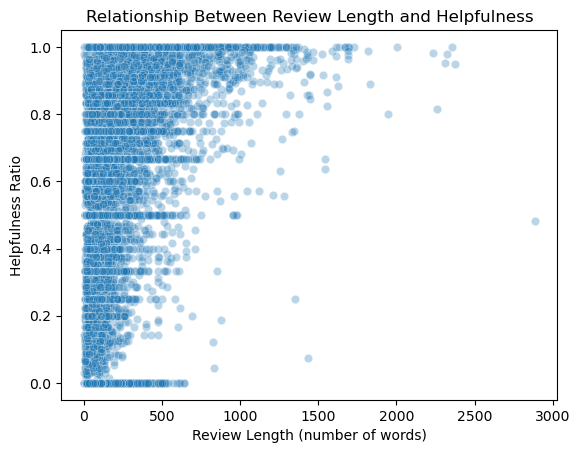

Correlation between review length and helpfulness ratio:
                   review_length  helpfulness_ratio
review_length           1.000000           0.158585
helpfulness_ratio       0.158585           1.000000


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate review length
df['review_length'] = df['review/text'].apply(lambda x: len(x.split()))

# Calculate helpfulness ratio (numerator / denominator, avoiding division by zero)
df['helpfulness_ratio'] = np.where(df['review/helpfulness_denominator'] > 0, 
                                   df['review/helpfulness_numerator'] / df['review/helpfulness_denominator'], 
                                   np.nan)

# Plot the relationship
sns.scatterplot(x=df['review_length'], y=df['helpfulness_ratio'], alpha=0.3)
plt.xlabel("Review Length (number of words)")
plt.ylabel("Helpfulness Ratio")
plt.title("Relationship Between Review Length and Helpfulness")
plt.show()

# Calculate correlation
correlation = df[['review_length', 'helpfulness_ratio']].corr()
print("Correlation between review length and helpfulness ratio:")
print(correlation)


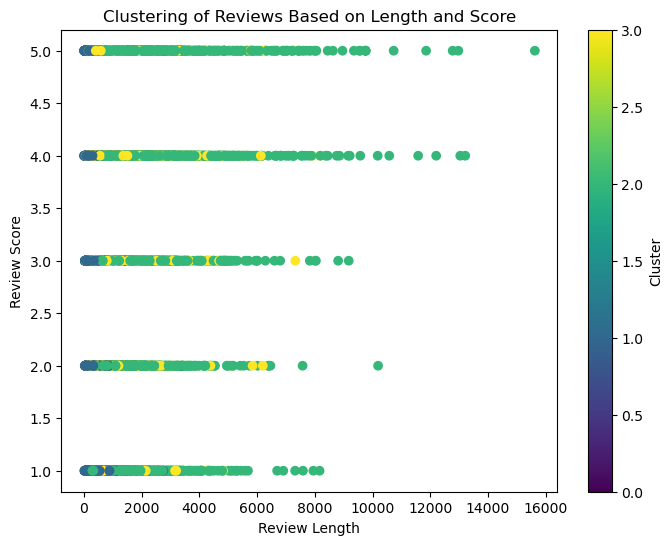

        review/score           review_length              sentiment_score
                mean       std          mean          std            mean
cluster                                                                  
0           3.546218  1.488187    559.934874   454.231680        0.466387
1           3.461246  1.617344    315.919507   267.800292        0.463169
2           3.523898  1.429766   1293.217500  1133.741425        0.402304
3           3.660302  1.351093    628.336851   578.659161        0.535143


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych
df = pd.read_csv("../data/output_with_sentiment.csv") 

# Obliczenie długości recenzji
df['review_length'] = df['review/text'].apply(len)

# Przygotowanie cech do klasteryzacji
# Zamiana sentymentu na wartości numeryczne: 0 dla negatywnych, 1 dla pozytywnych
df['sentiment_score'] = df['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# Weźmy tylko numeryczne cechy
X_numeric = df[['review/score', 'review/helpfulness_numerator', 'review/helpfulness_denominator', 'review_length', 'sentiment_score']]

# Vectorizacja tekstów (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['review/text'])

# Łączenie cech tekstowych z cechami numerycznymi
from scipy.sparse import hstack
X_combined = hstack([X_numeric, X_text])

# Normalizacja danych (skalowanie)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined.toarray())

# Klasteryzacja za pomocą KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Wykres rozkładu klastrów
plt.figure(figsize=(8, 6))
plt.scatter(df['review_length'], df['review/score'], c=df['cluster'], cmap='viridis')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.title('Clustering of Reviews Based on Length and Score')
plt.colorbar(label='Cluster')
plt.show()

# Podsumowanie wyników klasteryzacji
print(df.groupby('cluster').agg({'review/score': ['mean', 'std'], 
                                'review_length': ['mean', 'std'], 
                                'sentiment_score': ['mean']}))


In [15]:
# Example samples from each cluster
for cluster_num in range(4):
    print(f"\nCluster {cluster_num} examples:")
    cluster_samples = df[df['cluster'] == cluster_num].sample(3)  # Randomly selecting 3 examples
    for index, row in cluster_samples.iterrows():
        print(f"\nReview Text: {row['review/text']}")
        print(f"Score: {row['review/score']}")
        print(f"Review Length: {row['review_length']}")
        print(f"Sentiment: {row['sentiment']}")



Cluster 0 examples:

Review Text: This is made by Naztech and it fits my V3 perfectly.The case they sold at the Cingular store seemed a little long (on the ear piece) and slid on my phone. The plastic piece that fit near the phone hinge where it flips broke off and I had to get a replacement. I did not want the same case because it did not last long (22 days, cingular store would not replace it), looked like cheap plastic and cost more than this case.This case looks nice and protects my phone better because the fit is better and it has a swivel clip that seems just as nice as the previous case that swivel clip fits too so I have a backup. It is well made and nicely priced.
Score: 5.0
Review Length: 647
Sentiment: POSITIVE

Review Text: The design is interesting and new, and also practical. All in all, it works great, except for fear that the interchangeable booms of different size may fall out and force you to be with an expensive earpiece. The boom itself is a solid piece of hollow p

# Analysis Summary

## Clustering Review Data

Using KMeans clustering, reviews are grouped into four clusters based on features like review score, helpfulness ratio, review length, and sentiment score. Key insights include:
- **Cluster 0**: Medium-length, positive reviews with minor issues.
- **Cluster 1**: Short reviews with mixed sentiment.
- **Cluster 2**: Long, detailed, overwhelmingly positive reviews.
- **Cluster 3**: Medium-length, negative reviews highlighting product issues.